# Configuring MPSlib in Colab

In [1]:
module_name='mpslib'
try:
    __import__(module_name)
    print('%s allready installed. skipping installation.' % module_name)
    exe_folder = ''
        
except ImportError:
    import sys
    is_colab = 'google.colab' in sys.modules
    print (is_colab)
    if is_colab:
        import os
        os.chdir('/content')
        print('%s cannot be loaded. trying to install it.' % module_name)
        !curl -O https://raw.githubusercontent.com/ergosimulation/mpslib/master/install_latest_mpslib.sh
        !sh ./install_latest_mpslib.sh
        os.chdir('/content')
        exe_folder = '/content/mpslib'
    else:
        print('Pleas install MPSlib and scikit-mps from http://github.com/ergosimulation/mpslib/')
    
import sys
is_colab = 'google.colab' in sys.modules
if is_colab:
    exe_folder = '/content/mpslib'
else:
  exe_folder = ''

print("Using MPSlib installed in %s " % exe_folder)


True
mpslib cannot be loaded. trying to install it.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   367  100   367    0     0   2237      0 --:--:-- --:--:-- --:--:--  2251
Cloning into 'mpslib'...
remote: Enumerating objects: 4341, done.
remote: Counting objects: 100% (938/938), done.
remote: Compressing objects: 100% (383/383), done.
remote: Total 4341 (delta 583), reused 904 (delta 552), pack-reused 3403
Receiving objects: 100% (4341/4341), 30.55 MiB | 15.79 MiB/s, done.
Resolving deltas: 100% (2997/2997), done.
make -C mpslib
make[1]: Entering directory '/content/mpslib/mpslib'
g++ -o SNESIM.o -I. -O3 -march=native -std=c++11 -c SNESIM.cpp
g++ -o Coords3D.o -I. -O3 -march=native -std=c++11 -c Coords3D.cpp
g++ -o MPSAlgorithm.o -I. -O3 -march=native -std=c++11 -c MPSAlgorithm.cpp
g++ -o IO.o -I. -O3 -march=native -std=c++11 -c IO.cpp
g++ -o Coords4D.o -I. -O3 -march=na

In [2]:
!mv "/content/mpslib" "/usr/local/lib/python3.7"
print(f"Using MPSlib installed in {exe_folder}.")
# Copying algorithms to previous folder
!cp -n "/usr/local/lib/python3.7/mpslib/mps_snesim_tree" "/usr/local/lib/python3.7/mps_snesim_tree"
!cp -n "/usr/local/lib/python3.7/mpslib/mps_genesim" "/usr/local/lib/python3.7/mps_genesim"

Using MPSlib installed in /content/mpslib.


In [3]:
import mpslib as mps
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

## Helpful functions

In [4]:
def plot(image: np.array, title: str):
    plt.figure(figsize=(16,9))
    plt.axis('off')
    plt.title(f'{title}')
    plt.imshow(image, cmap='gray')

# Training Image visualization

Beginning download of https://github.com/GAIA-UNIL/trainingimages/raw/master/MPS_book_data/Part2/ti_strebelle.sgems to ti_strebelle.dat


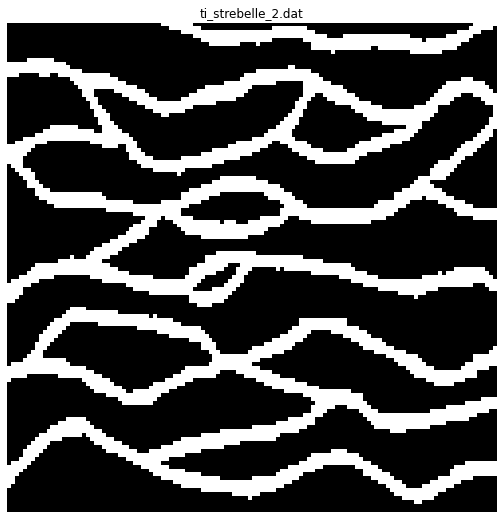

In [5]:
# Get training images from GAIA-UNIL repo
TI, TI_filename = mps.trainingimages.strebelle(di=2, coarse3d=1)

plot(TI[:,:,0].T, TI_filename)

# Creating the algorithm and setting parameters

The following entries appear in all parameter files:
<br><br>
`Number of realizations`: The number of realizations to run and generate.
<br><br>
`random_seed`: An integer that determines the random seed. A fixed value will return the same realizations for each run.
<br>
**Observation: Assigning `0` to `random_seed` will generate a new seed at each iteration**
<br><br>
`simulation_grid_size`: The dimensions of the simulation grid cell, a `numpy` array with 3 dimensions - X, Y, Z.
<br><br>
`origin`: Simulation grid origin X, Y, Z, must be a `numpy` array of integers. Refers to the value of the coordinates in the X, Y, and Z direction.
<br><br>
`grid_cell_size`: The size of each pixel in the simulation grid, in the X, Y, and Z direction.
<br><br>
`ti_fnam`: The name of the training image file (no spaces allowed). It must be in GLSIB/EAS ASCII format, and the first line (the 'title') must contain the dimension of the traning file as nX, nY, nZ.
<br><br>
`out_folder`: The path to the folder containing all output. Use forward slash '/' to separate folders - also, spaces in name not allowed.
<br><br>
`shuffle_simulation_grid`: Shuffle simulation grid path:
- `0`: sequential path through simulation grid (possibly a multiple grid).
- `1`: random path through simulation grid.
- `2`: preferential path.
<br><br>
`n_max_cpdf_count`: The maximum number of counts for conditional PDF.
<br><br>
`shuffle_ti_grid`: Shuffle Training Image path - does not affect SNESIM type algrothms.
- `0`: sequential path
- `1`: random path
<br><br>
`hard_data_fnam`: Hard data filename - this file consists of an EAS archive with 4 columns: X, Y, Z, and D
<br><br>
`hard_data_search_radius`: World units around the search radius for hard data.
<br><br>
`soft_data_categories`: Soft data categories, separated by `;`.
<br><br>
`soft_data_fnam`: Soft data filenames - separated by `;` only need `number_categories - 1` grids
<br><br>
`n_threads`: Refers to the quantity of CPUs to use for simulation (minimum 1, maximum 8 - depends on your CPU)
Currently not used.
<br><br>
`debug_level`: Refers to the level of debugging during processing. 
- `-2`: No information is written to screen or files on disk
- `-1`: + Simulation output is written to files on disk.
- `0`: + Information about simulation is written to screen
- `1`: + Simulated realization(s) are shown in terminal
- `2`: + Extra information is written to disk (Random path, ...)
- `3`: + Debug information written to screen (in general not useful for an end-user)

## GENESIM

In [6]:
O = mps.mpslib(method='mps_genesim', verbose_level=-1, debug_level=-1)
O.parameter_filename = 'mps.txt'
O.par['n_real']=10
O.par['n_cond']=10
O.par['template_size']=np.array([[10, 5],[10, 5],[1, 1]])
O.par['origin']=np.array([0,0,0])
O.par['simulation_grid_size']=np.array([100, 100, 1])

Using MPSlib installed in /usr/local/lib/python3.7 (from /usr/local/lib/python3.7/dist-packages/mpslib/mpslib.py)


In [7]:
# Setting TI to memory
O.ti = TI

# Serial
O.run_parallel()

parallel: using 2 threads to simulate 10 realizations
parallel: with up to 5 relizations per thread
parallel: Using 2 of max 2 threads
__name__ = mpslib.mpslib
Thread:000, nr=5
Thread:001, nr=5
parallel job done. Collecting data from threads
parallel: collected 10 realizations


### Plotting slices of TI

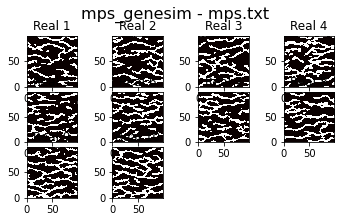

In [8]:
O.plot_reals()

### Plotting E-Type mean and standard deviation images

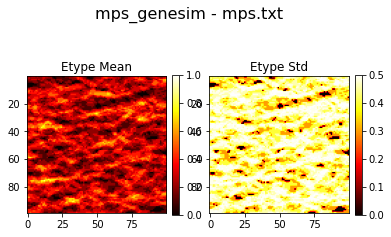

In [9]:
O.plot_etype()

# Estimation

Using MPSlib installed in /usr/local/lib/python3.7 (from /usr/local/lib/python3.7/dist-packages/mpslib/mpslib.py)
mpslib: Writing GENESIM type parameter file: mps_est.txt
mpslib: trying to run 'mps_genesim' on 'mps_est.txt' in folder '/usr/local/lib/python3.7/mps_genesim'
mpslib: Using the following executable to run the model: /usr/local/lib/python3.7/mps_genesim
mpslib: trying to run  /usr/local/lib/python3.7/mps_genesim mps_est.txt
mpslib: 'mps_genesim' ran in  239.35s 
mpslib: Reading: ti.dat_sg_0.gslib
loading entropy from ti.dat_ent_0.gslib
loading entropy from ti.dat_cg_0.gslib
loading entropy from ti.dat_cg_1.gslib


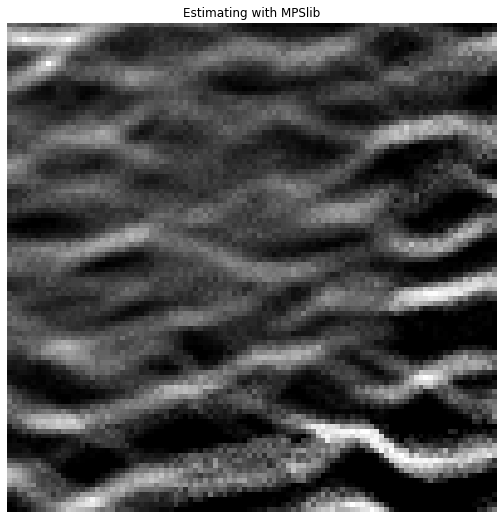

In [10]:
import mpslib as mps
import matplotlib.pyplot as plt
import numpy as np
import copy

# Initialize the MPS object, using a specific algorithm
O=mps.mpslib(method='mps_genesim', verbose_level=1)

# Select number of iterations [def=1]
O.par['n_real']=500
O.par['n_cond']=100
O.par['simulation_grid_size'][0]=100
O.par['simulation_grid_size'][1]=100
O.par['simulation_grid_size'][2]=1
O.par['hard_data_fnam']='hard.dat'
# Use hard data
# Set hard data
d_hard = np.array([[ 3, 3, 0, 1],
                    [ 8, 8, 0, 1],
                    [ 12, 3, 0, 1]])
O.d_hard = d_hard


# Set training image
O.ti = mps.trainingimages.strebelle(di=2, coarse3d=1)[0]

# Run MPSlib in Estimation mode
O_est = copy.deepcopy(O)
O_est.parameter_filename='mps_est.txt'
O_est.delete_local_files() # to make sure no old data are floating around
O_est.par['do_estimation']=1
O_est.par['do_entropy']=1

O_est.par['n_real']=1
O_est.par['n_max_cpdf_count']=1000000 # We need ENESIM/GENESIM and not DS
O_est.par['n_max_ite']=1000000
O_est.remove_gslib_after_simulation=0

O_est.run()

D_est = mps.eas.read('ti.dat_cg_1.gslib')
P1=D_est['Dmat'][:,:,0]
P1=P1.transpose()

D_ent = mps.eas.read('ti.dat_ent_0.gslib')
H=D_ent['Dmat'][:,:,0]
H=H.transpose()

plot(P1, "Estimating with MPSlib")